# **K-최근접 이웃(KNN : K Nearest Neighbors)**

---

- 목표
    - 와인 정보가 들어있는 데이터 셋을 이용해 와인 등급을 예측하라.
- 알고리즘 : KNN
- 문제유형 : 분류
- 종속변수 : class(등급)
- 데이터셋
    - 파일명 : wine.csv
    - 소개
        - 와인에 대한 데이터입니다. 총 3가지 목푯값으로 이루어진 범주형 변수이기 때문에 다중분류(multiclassification)문제에 해당합니다. 알코올, 밀산, 마그네슘, 색조 등이 독립변수로, 와인등급 class가 종속변수로 사용됩니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [4]:
# ______.nunique()  : 고윳값 가짓수 출력
# ______.value_counts() : 각 고윳값에 해당하는 개수 출력
data['class'].unique()# 해당 변수의 고윳값 출력

array([0, 1, 2], dtype=int64)

In [5]:
data['class']

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: class, Length: 178, dtype: int64

<AxesSubplot: ylabel='count'>

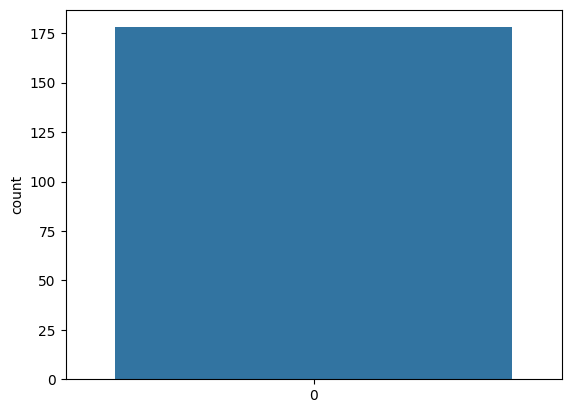

In [6]:
# sns.barplot(x=data['class'].value_counts().index, y=data['class'].value_counts())
sns.countplot(data['class'])

In [7]:
# 결측치 확인법
data.isna()
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [ ]:
# 방식 01
data = data.dropna() # 결측치가 존재하는 행을 제거
data.dropna(inplace=True)
data.dropna(subset=['alchol']) # 특정 변수상의 결측치가 존재하는 행을 제거

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [ ]:
# 방식 02
data.drop(['alcohol', 'nonflavanoid_phenols'], axis=1) # 결측치가 보이는 특정 변수 제거

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

In [ ]:
# 방식 03
data.fillna(-99) # 결측치를 -99로 채우기, 일반적으로 평균값이나 중윗값을 사용함.
data.fillna(data.mean()) # 결측치를 평균값으로 채우기, 별도의 컬럼명을 지정하지않아도 각 컬럼의 평균값으로 대체됨.


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


### 통상적으로 50% 이상이면 `drop()`을 고려해볼 만 하고, 70~80% 이상이면 가급적 `drop()`을 적용하는 것이 좋습니다.  
### 하지만 경우에 따라서는 90%가 결측치라고 해도, 해당 변수가 프로젝트에서 매우 중요한 역할을 할 거라 예상된다면 어떻게든 활용법을 찾는것이 좋습니다.

In [8]:
data.fillna(data.median(), inplace=True)

In [9]:
data.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Standard Scaling
st_scaler = StandardScaler()
st_scaler.fit(data) # 학습
st_scaled = st_scaler.transform(data)
st_scaled = pd.DataFrame(st_scaled, columns = data.columns)
round(st_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


In [15]:
# Robust Scaling
rb_scaler = RobustScaler()
rb_scaled = rb_scaler.fit_transform(data)
rb_scaled = pd.DataFrame(rb_scaled, columns=data.columns)
round(rb_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


In [17]:
# Min-Max Scaling
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data)
mm_scaled = pd.DataFrame(mm_scaled, columns=data.columns)
round(mm_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=100)

In [19]:
mmScaler = MinMaxScaler()
mmScaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train_scaled = mmScaler.transform(X_train)
X_test_scaled = mmScaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7) # KNN 모델 객체 생성
knn.fit(X_train_scaled, y_train) # 학습
pred = knn.predict(X_test_scaled) # 예측
pred

array([1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9166666666666666

In [28]:
score = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i) # KNN 모델 객체 생성
    knn.fit(X_train_scaled, y_train) # 학습
    pred = knn.predict(X_test_scaled) # 예측
    acc = accuracy_score(y_test, pred)
    score.append(acc)
    print(f'{i}th Accuracy Score : { acc }')

1th Accuracy Score : 0.9166666666666666
2th Accuracy Score : 0.8888888888888888
3th Accuracy Score : 0.8888888888888888
4th Accuracy Score : 0.9166666666666666
5th Accuracy Score : 0.8888888888888888
6th Accuracy Score : 0.9166666666666666
7th Accuracy Score : 0.9166666666666666
8th Accuracy Score : 0.8888888888888888
9th Accuracy Score : 0.8888888888888888
10th Accuracy Score : 0.8888888888888888
11th Accuracy Score : 0.9166666666666666
12th Accuracy Score : 0.9166666666666666
13th Accuracy Score : 0.9722222222222222
14th Accuracy Score : 0.9444444444444444
15th Accuracy Score : 0.9444444444444444
16th Accuracy Score : 0.9444444444444444
17th Accuracy Score : 0.9166666666666666
18th Accuracy Score : 0.9722222222222222
19th Accuracy Score : 0.9444444444444444
20th Accuracy Score : 0.9722222222222222


<AxesSubplot: >

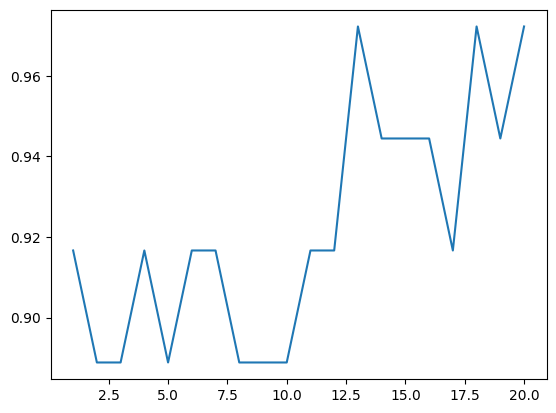

In [30]:
sns.lineplot(x=range(1, 21), y=score)